In [6]:
import numpy as np
import pandas as pd
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

<ipython-input-6-8eefc4b59ca6>:3: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [7]:
 dataset = pd.read_csv('housing (1).csv')

In [8]:
 len(dataset)

506

In [9]:
 dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [10]:
dataset.shape

(506, 14)

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


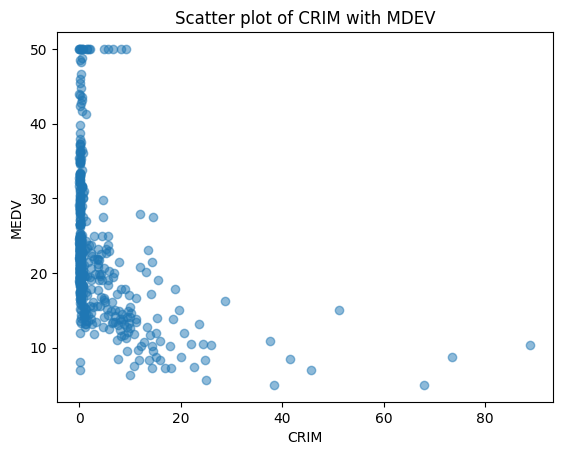

In [12]:
plt.scatter(dataset['CRIM'], dataset['MEDV'], alpha=0.5)
plt.title('Scatter plot of CRIM with MDEV')
plt.xlabel('CRIM')
plt.ylabel('MEDV')
plt.show()

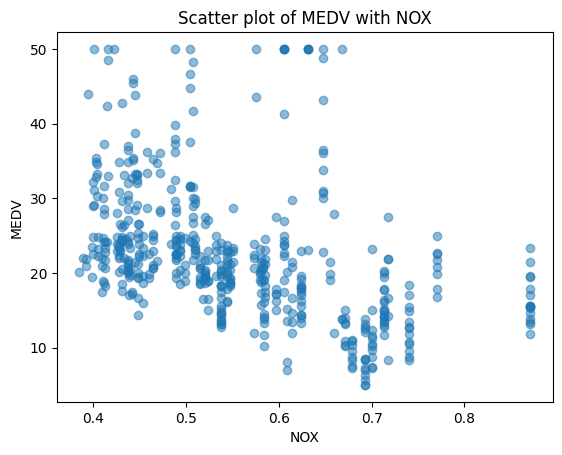

In [13]:
 plt.scatter(dataset['NOX'], dataset['MEDV'], alpha=0.5)
 plt.title('Scatter plot of MEDV with NOX')
 plt.xlabel('NOX')
 plt.ylabel('MEDV')
 plt.show()


In [14]:
print("\nMissing values in the dataset:")
print(dataset.isnull().sum())


Missing values in the dataset:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
print("\nStatistics of the dataset:")
print(dataset.describe())


Statistics of the dataset:
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   

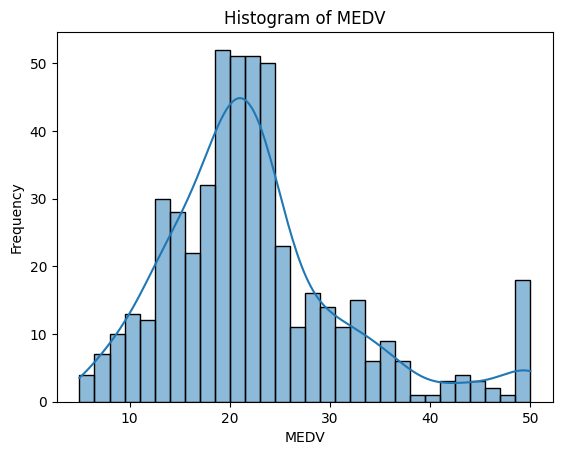

In [28]:
sns.histplot(dataset['MEDV'],kde=True,bins=30)
plt.title('Histogram of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

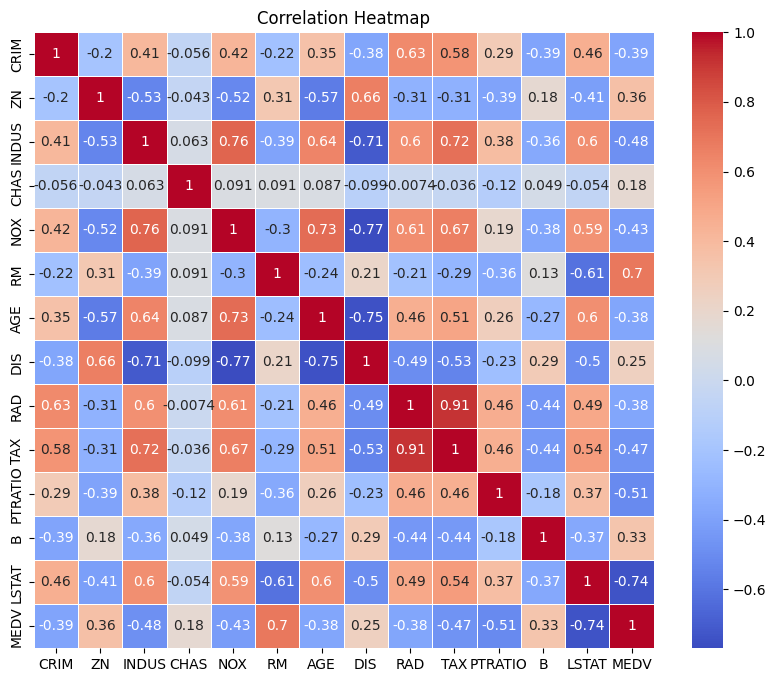

In [17]:
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

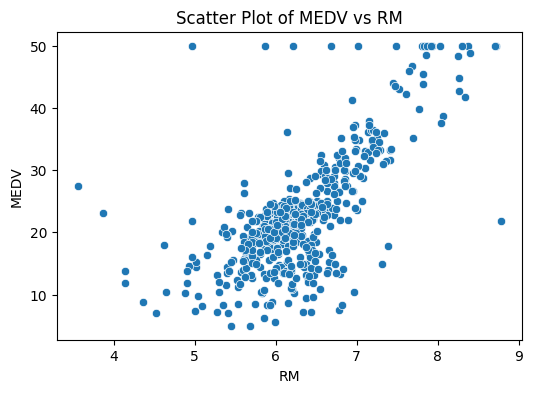

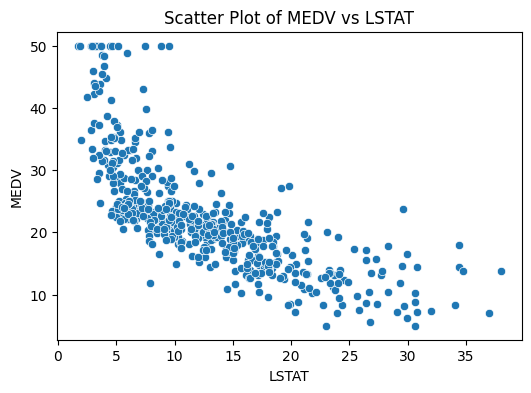

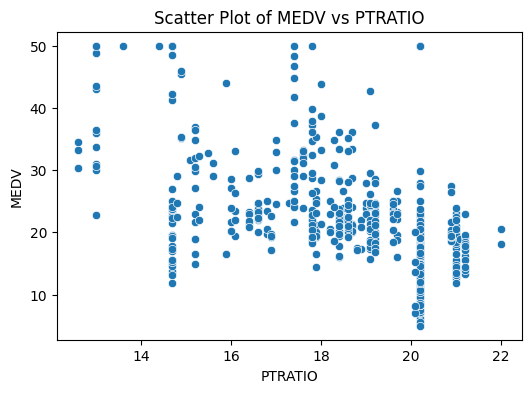

In [19]:
features=['RM','LSTAT','PTRATIO'] # Changed 'LSAT' to 'LSTAT'
for feature in features:
  plt.figure(figsize=(6,4))
  sns.scatterplot(x=dataset[feature],y=dataset['MEDV'])
  plt.title(f'Scatter Plot of MEDV vs {feature}')
  plt.xlabel(feature)
  plt.ylabel('MEDV')
  plt.show()

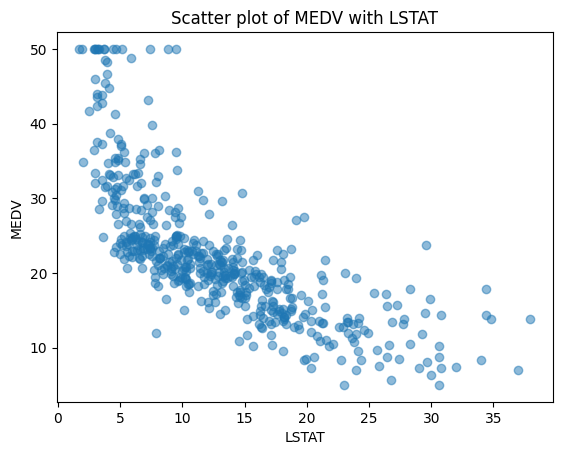

In [20]:
plt.scatter(dataset['LSTAT'], dataset['MEDV'], alpha=0.5)
plt.title('Scatter plot of MEDV with LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

Text(0, 0.5, 'MEDV')

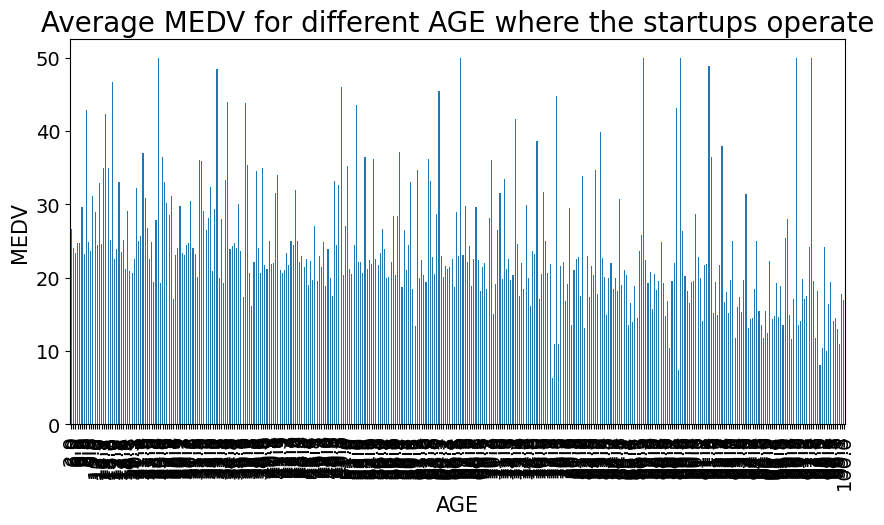

In [21]:
ax = dataset.groupby(['AGE'])['MEDV'].mean().plot.bar(
figsize = (10,5),
fontsize = 14
)
ax.set_title("Average MEDV for different AGE where the startups operate", fontsize = 20)
ax.set_xlabel("AGE", fontsize = 15)
ax.set_ylabel("MEDV", fontsize = 15)

In [22]:
dataset.AGE.value_counts()

,count
AGE,
100.0,43
95.4,4
96.0,4
98.2,4
97.9,4
...,...
58.4,1
74.4,1
73.4,1


In [29]:
 dataset['CRIM'] = np.where(dataset['NOX']=='CRIM', 1, 0)
 dataset['AGE'] = np.where(dataset['NOX']=='LSTAT', 1, 0)
 dataset['DIS'] = np.where(dataset['NOX']=='PTRATIO', 1, 0)
 dataset['RAD'] = np.where(dataset['NOX']=='RAD', 1, 0)

 dataset.drop(columns=['NOX'],axis=1,inplace=True)
 dataset.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0,18.0,2.31,0,6.575,0,0,0,296,15.3,396.90,4.98,24.0
1,0,0.0,7.07,0,6.421,0,0,0,242,17.8,396.90,9.14,21.6
2,0,0.0,7.07,0,7.185,0,0,0,242,17.8,392.83,4.03,34.7
3,0,0.0,2.18,0,6.998,0,0,0,222,18.7,394.63,2.94,33.4
4,0,0.0,2.18,0,7.147,0,0,0,222,18.7,396.90,5.33,36.2


In [24]:
 dependent_variable = 'MEDV'

 independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})
 independent_variables


['CRIM',
 'PTRATIO',
 'B',
 'NOX',
 'ZN',
 'TAX',
 'CHAS',
 'RM',
 'RAD',
 'DIS',
 'INDUS',
 'MEDV',
 'LSTAT',
 'AGE']

In [31]:
dependent_variable = 'MEDV'
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

X = dataset[independent_variables].values
y = dataset[dependent_variable].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train[0:10]

array([[  0.   ,  17.4  , 391.7  , 307.   ,   0.   ,   1.   ,   6.951,
          0.   ,   0.   ,   6.2  ,   9.71 ,   0.   ],
       [  0.   ,  19.2  , 376.94 , 305.   ,   0.   ,   0.   ,   5.961,
          0.   ,   0.   ,  10.81 ,   9.88 ,   0.   ],
       [  0.   ,  16.6  , 391.25 , 300.   ,  30.   ,   0.   ,   6.897,
          0.   ,   0.   ,   4.93 ,  11.38 ,   0.   ],
       [  0.   ,  15.2  , 395.6  , 311.   ,  12.5  ,   0.   ,   6.012,
          0.   ,   0.   ,   7.87 ,  12.43 ,   0.   ],
       [  0.   ,  20.2  , 127.36 , 666.   ,   0.   ,   0.   ,   5.304,
          0.   ,   0.   ,  18.1  ,  26.64 ,   0.   ],
       [  0.   ,  20.2  , 316.03 , 666.   ,   0.   ,   0.   ,   4.963,
          0.   ,   0.   ,  18.1  ,  14.   ,   0.   ],
       [  0.   ,  21.   , 396.9  , 273.   ,   0.   ,   0.   ,   6.12 ,
          0.   ,   0.   ,  11.93 ,   9.08 ,   0.   ],
       [  0.   ,  16.1  , 383.61 , 329.   ,  34.   ,   0.   ,   6.495,
          0.   ,   0.   ,   6.09 ,   8.67 ,   0.   ],


In [33]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[0:10]

array([[0.        , 0.5106383 , 0.98688789, 0.22900763, 0.        ,
        1.        , 0.64954972, 0.        , 0.        , 0.21041056,
        0.22638298, 0.        ],
       [0.        , 0.70212766, 0.94966968, 0.22519084, 0.        ,
        0.        , 0.45985821, 0.        , 0.        , 0.37939883,
        0.23120567, 0.        ],
       [0.        , 0.42553191, 0.98575319, 0.21564885, 0.3       ,
        0.        , 0.63920291, 0.        , 0.        , 0.1638563 ,
        0.27375887, 0.        ],
       [0.        , 0.27659574, 0.99672197, 0.23664122, 0.125     ,
        0.        , 0.4696302 , 0.        , 0.        , 0.27162757,
        0.3035461 , 0.        ],
       [0.        , 0.80851064, 0.3203389 , 0.91412214, 0.        ,
        0.        , 0.33397203, 0.        , 0.        , 0.64662757,
        0.70666667, 0.        ],
       [0.        , 0.80851064, 0.7960815 , 0.91412214, 0.        ,
        0.        , 0.26863384, 0.        , 0.        , 0.64662757,
        0.34808511,

In [34]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
 regressor.intercept_

18.923921572931995

In [36]:
 regressor.coef_

array([ 0.00000000e+00, -9.56390420e+00,  3.38776062e+00, -1.73146865e+00,
        2.14213470e-01,  2.96843260e+00,  2.33879012e+01,  0.00000000e+00,
        8.88178420e-16,  6.31812711e-01, -1.75241534e+01,  0.00000000e+00])

In [37]:
y_pred_train = regressor.predict(X_train)
y_train


array([26.7, 21.7, 22. , 22.9, 10.4, 21.9, 20.6, 26.4, 41.3, 17.2, 27.1,
       20.4, 16.5, 24.4,  8.4, 23. ,  9.7, 50. , 30.5, 12.3, 19.4, 21.2,
       20.3, 18.8, 33.4, 18.5, 19.6, 33.2, 13.1,  7.5, 13.6, 17.4,  8.4,
       35.4, 24. , 13.4, 26.2,  7.2, 13.1, 24.5, 37.2, 25. , 24.1, 16.6,
       32.9, 36.2, 11. ,  7.2, 22.8, 28.7, 14.4, 24.4, 18.1, 22.5, 20.5,
       15.2, 17.4, 13.6,  8.7, 18.2, 35.4, 31.7, 33. , 22.2, 20.4, 23.9,
       25. , 12.7, 29.1, 12. , 17.7, 27. , 20.6, 10.2, 17.5, 19.7, 29.8,
       20.5, 14.9, 10.9, 19.5, 22.7, 19.5, 24.6, 25. , 24.5, 50. , 14.3,
       11.8, 31. , 28.7, 16.2, 43.5, 25. , 22. , 19.9, 22.1, 46. , 22.9,
       20.2, 43.1, 34.6, 13.8, 24.3, 21.5, 24.4, 21.2, 23.8, 26.6, 25.1,
        9.6, 19.4, 19.4,  9.5, 14. , 26.5, 13.8, 34.7, 16.3, 21.7, 17.5,
       15.6, 20.9, 21.7, 12.7, 18.5, 23.7, 19.3, 12.7, 21.6, 23.2, 29.6,
       21.2, 23.8, 17.1, 22. , 36.5, 18.8, 21.9, 23.1, 20.2, 17.4, 37. ,
       24.1, 36.2, 15.7, 32.2, 13.5, 17.9, 13.3, 11

In [38]:
y_pred = regressor.predict(X_test)
y_pred

array([26.64606412, 21.16242228, 29.64532266, 12.44911136, 22.29980708,
       20.37090758, 19.00276275, 21.59456773, 16.74958712, 18.93819147,
       11.50120204, 14.49871748, 17.20498267,  5.09499196, 41.72104708,
       33.58169441, 20.94007776, 37.56743247, 29.50114486, 22.17781866,
       25.13903379, 24.75914047, 18.67930259, 27.60209396, 22.2057491 ,
        6.72362958, 18.26689606, 21.38740783, 35.54851101, 20.13874379,
       16.91356968, 18.24991772, 22.97742799, 24.06799852, 27.11297255,
       19.62770606, 11.82820661, 22.76980186, 15.30720804, 13.13561015,
       26.92070479, 20.71307616, 24.87238332, 13.23038853, 28.0610467 ,
       26.12507848, 21.80127703, 27.07567123, 12.21690488, 23.75011684,
       25.23798122, 16.66691128, 22.91906916, 35.55134003, 14.18159319,
       22.88279311, 22.02316694, 20.3076401 , 15.71156136, 22.10663467,
       23.28749532, 22.2045987 , 32.20387426, 29.41731805, 16.57097122,
       31.0290283 , 18.96040114, 22.73048356, 17.32121058, 22.04

In [39]:
 y_test

array([22.6, 50. , 23. ,  8.3, 21.2, 19.9, 20.6, 18.7, 16.1, 18.6,  8.8,
       17.2, 14.9, 10.5, 50. , 29. , 23. , 33.3, 29.4, 21. , 23.8, 19.1,
       20.4, 29.1, 19.3, 23.1, 19.6, 19.4, 38.7, 18.7, 14.6, 20. , 20.5,
       20.1, 23.6, 16.8,  5.6, 50. , 14.5, 13.3, 23.9, 20. , 19.8, 13.8,
       16.5, 21.6, 20.3, 17. , 11.8, 27.5, 15.6, 23.1, 24.3, 42.8, 15.6,
       21.7, 17.1, 17.2, 15. , 21.7, 18.6, 21. , 33.1, 31.5, 20.1, 29.8,
       15.2, 15. , 27.5, 22.6, 20. , 21.4, 23.5, 31.2, 23.7,  7.4, 48.3,
       24.4, 22.6, 18.3, 23.3, 17.1, 27.9, 44.8, 50. , 23. , 21.4, 10.2,
       23.3, 23.2, 18.9, 13.4, 21.9, 24.8, 11.9, 24.3, 13.8, 24.7, 14.1,
       18.7, 28.1, 19.8])

In [40]:
mean_squared_error(y_test, y_pred)

40.513460853914445

In [41]:
mean_squared_error(y_test, y_pred)

40.513460853914445

In [42]:
math.sqrt(mean_squared_error(y_test, y_pred))

6.365018527381868

In [43]:
 r2_score(y_train, y_pred_train)

0.7384084935496986